In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def split_real_im(c): 
    c = complex(c)
    return pd.Series([c.real,c.imag])

In [3]:
# import input and target data 
all_input = pd.read_csv("../Samples_3-bus_ACOPF/oT_Result_NN_Input_3-bus.csv")
all_output = pd.read_csv("../Samples_3-bus_ACOPF/oT_Result_NN_Output_3-bus.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Samples_3-bus_ACOPF/oT_Result_NN_Input_3-bus.csv'

In [ ]:
folder = "Samples_3-bus_ACOPF"

In [ ]:
periods = np.unique(all_input.Period)
scenarios = np.unique(all_input.Scenario)
timestamps = np.unique(all_input.LoadLevel)
variables = np.unique(all_input.Variable)
Datasets = np.unique(all_input.Dataset)
executions = np.unique(all_input.Execution)

variables_o = np.unique(all_output.Variable)

In [4]:
#Select a certain scenario and execution
exe = executions[0]
per = periods[0]
sc = scenarios[0]


for exe in executions[0:2]: 
    variables_to_keep = variables
    # variables_to_keep_o = np.sort(np.unique(all_output.Variable))[[0,1,3,4]]
    variables_to_keep_o = ["vTotalCCost","vTotalECost","vTotalGCost","vTotalRCost"]

    #Filter the main frame on desired parameters: 
    f_i = (all_input.LoadLevel.isin(timestamps))& (all_input.Execution == exe ) & (all_input.Period == per )& (all_input.Scenario == sc)& (all_input.Variable.isin(variables_to_keep))
    input_f = pd.DataFrame(all_input[f_i])

    f_o = (all_output.LoadLevel.isin(timestamps))& (all_output.Execution == exe ) & (all_output.Period == per )& (all_output.Scenario == sc)& (all_output.Variable.isin(variables_to_keep_o))
    output_f = pd.DataFrame(all_output[f_o])

    # #And then add to new frame the two parts of the complex numbers: 
    # input_f[['Value_R', 'Value_I']] = input_f["Value"].apply(split_real_im)

    #Pivot 
    # input_f_p = input_f.pivot(index = "LoadLevel",columns=["Variable"],values = ["Value_R","Value_I"])
    # input_f_p = input_f.pivot(index = ["LoadLevel","Dataset"],columns=["Variable"],values = "Value")
    real_in_p = input_f[input_f.Dataset != "MatrixYImag"].pivot(index = ["LoadLevel"],columns=["Variable"],values = "Value")

    imag_in_p = input_f[input_f.Dataset == "MatrixYImag"].pivot(index = ["LoadLevel"],columns=["Variable"],values = "Value").add_suffix("_I")

    input_f_p = pd.concat([real,imag],axis=1).reindex(sorted(pd.concat([real,imag],axis=1).columns), axis=1)

    output_f_p = output_f.pivot(index = "LoadLevel",columns=["Variable"],values = "Value")

    #Write to separate csv file
    input_f_p.to_csv(f"Data/{folder}/input_f_{sc}_{exe}_{per}.csv")
    output_f_p.to_csv(f"Data/{folder}/output_f_{sc}_{exe}_{per}.csv")

NameError: name 'executions' is not defined

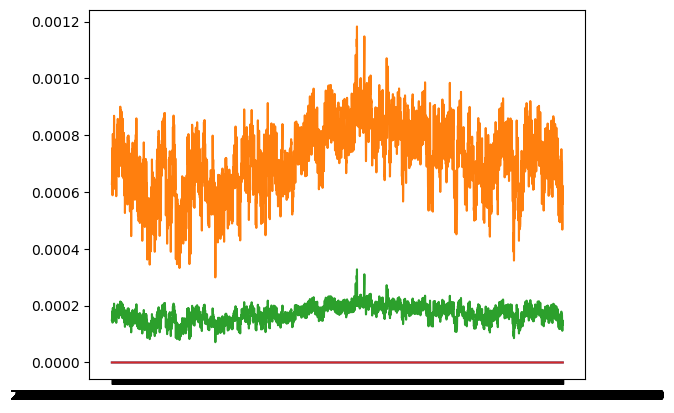

In [72]:
plt.plot(output_f_p)

C:\Users\u0138303\AppData\Local\Temp\ipykernel_37296\3701956675.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pv_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="SolarPV_1"].Value]
C:\Users\u0138303\AppData\Local\Temp\ipykernel_37296\3701956675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wind_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="WindFarm_1"].Value]


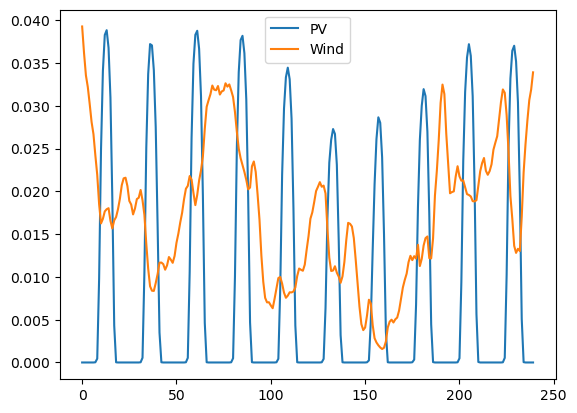

In [122]:
pv_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="SolarPV_1"].Value]
wind_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="WindFarm_1"].Value]
end = 240
plt.plot(pv_output[0:end],label = "PV")
plt.plot(wind_output[0:end], label = "Wind")
plt.legend()